In [263]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn.linear_model import LinearRegression

In [264]:
#takes a random dataset and filters linearly correlated points
def dataFilterLinear(dataSet, m, width):
    indexes = []
    for i in range(len(dataSet)):
        c = width
        y = dataSet[i,1]
        x = dataSet[i,0]
        c += np.random.randint(-c/4, c/4)
        if(y <= ((m*x)-c) or y >=  ((m*x)+c)):
            indexes.append(i)
    return np.delete(dataSet, indexes, 0)

In [265]:
#plots a dataSet and a line
def fitPlotter(dataSet, m, c, style, name):
    x = np.linspace(min(dataSet[:,0]),max(dataSet[:,0]),100)
    y = m*x+c
    plt.plot(x,y, style, label=name)
    plt.plot(dataSet[:,0],dataSet[:,1], '.g')
    plt.legend(loc=4)
    plt.show()

In [266]:
#the (euclidean) distance between two vectors
def distance(a,b):
    return np.linalg.norm(np.subtract(a,b))

In [275]:
#batch gradient descent
def batchGradientDescent(dataSet, model, learningRate):
    gradwm = 0
    gradwc = 0
    
    m = model[0]
    c = model[1]
    N = len(dataSet)
    
    for point in dataSet:
        x = point[0]
        y = point[1]
        
        gradwm += (2/N)*x*(m*x + c - y)
        gradwc += (2/N)*(m*x + c - y)
    
    grad = [gradwm, gradwc]
    updatedModel = np.subtract(model, np.multiply(learningRate,grad))
    if distance(model, updatedModel)< 0.01:     
        return updatedModel
    else:
        return batchGradientDescent(dataSet, updatedModel, learningRate)

In [268]:
#mini batch gradient descent
def miniBatchGradientDescent(dataSet, batchSize, model, learningRate):
    #break dataSet into parts
    if batchSize > len(dataSet):
        miniBatch = [0]*batchSize
        for i in range(batchSize):
            if dataSet != []:
                miniBatch[i] = dataSet[i]
        np.delete(dataSet,[i for i in range(batchSize)],0)
    else:
        miniBatch = dataSet
            
    if distance(model, miniBatchGradientDescentHelper(miniBatch, model, learningRate))<0.01:
        return model
    else:
        return miniBatchGradientDescent(dataSet, batchSize, model, learningRate)

#a helper function for miniBatchGradientDescent
def miniBatchGradientDescentHelper(dataSet, model, learningRate):
    gradwm = 0
    gradwc = 0
    
    m = model[0]
    c = model[1]
    N = len(dataSet)
    
    for point in dataSet:
        x = point[0]
        y = point[1]
        
        gradwm += (2/N)*x*(m*x + c - y)
        gradwc += (2/N)*(m*x + c - y)
    
    grad = [gradwm, gradwc]
    updatedModel = np.subtract(model, np.multiply(learningRate,grad))
    
    return updatedModel
    

In [269]:
#Stochastic Gradient Descent
def stochasticGradientDescent(dataSet, model, learningRate):
    return miniBatchGradientDescent(dataSet, 1, model, learningRate)

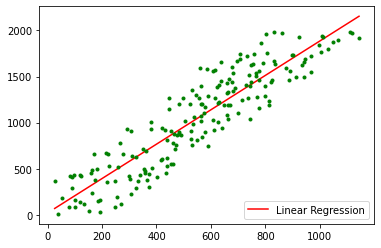

In [270]:
#Creating a linearly correlated data set
#Plotted it with it's Linear Regression fit
dataSet = np.random.randint(0,2000, size = [1000,2])
dataSet = dataFilterLinear(dataSet,2,400)
reg = LinearRegression().fit(dataSet[:,0].reshape(-1,1),dataSet[:,1])
fitPlotter(dataSet, reg.coef_[0], reg.intercept_, '-r', 'Linear Regression')

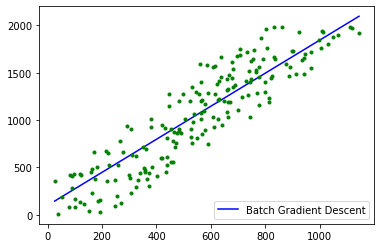

In [271]:
#Batch Gradient Descent
#no point plotting LR and BGD together since they overlap
batchGDModel = batchGradientDescent(dataSet, [1,100], 0.000001)
fitPlotter(dataSet, batchGDModel[0], batchGDModel[1], '-b', 'Batch Gradient Descent')

In [272]:
#even for very small learning rates, mini batch gradient descent is not converging :(
miniBatchGradientDescent(dataSet,20,[1,1],0.0000001)
stochasticGradientDescent(dataSet,[1,1],0.0000001)

RecursionError: maximum recursion depth exceeded while calling a Python object